In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
indice_22 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2022.csv",
                        parse_dates = True, index_col=0)
indice_23 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2023.csv",
                        parse_dates = True, index_col=0)
indice = pd.concat([indice_22, indice_23], axis = 0)  # Axis = 0 -> Se concatenan por filas
len(indice)

13104

In [4]:
indice

,Hora,Noroeste ozono,Noroeste diÛxido de azufre,Noroeste diÛxido de nitrÛgeno,Noroeste monÛxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste diÛxido de azufre,Noreste diÛxido de nitrÛgeno,...,Suroeste diÛxido de nitrÛgeno,Suroeste monÛxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste diÛxido de azufre,Sureste diÛxido de nitrÛgeno,Sureste monÛxido de carbono,Sureste PM10,Sureste PM25
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01,1,4.0,8,24.0,15.0,114,82.0,15.0,6,24.0,...,26.0,7.0,58.0,72.0,18.0,4.0,19.0,10.0,102.0,95.0
2022-01-01,2,4.0,8,23.0,16.0,115,83.0,16.0,8,22.0,...,16.0,7.0,60.0,75.0,15.0,4.0,18.0,11.0,103.0,99.0
2022-01-01,3,3.0,8,22.0,18.0,118,85.0,7.0,8,19.0,...,21.0,8.0,67.0,79.0,14.0,4.0,20.0,13.0,103.0,99.0
2022-01-01,4,3.0,8,21.0,21.0,122,87.0,4.0,8,21.0,...,20.0,8.0,73.0,85.0,10.0,4.0,20.0,13.0,103.0,106.0
2022-01-01,5,7.0,8,20.0,22.0,127,91.0,4.0,8,19.0,...,17.0,9.0,77.0,90.0,9.0,4.0,20.0,13.0,104.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,20,14.0,4,18.0,4.0,35,NaN,16.0,4,14.0,...,15.0,2.0,10.0,23.0,14.0,2.0,14.0,4.0,40.0,19.0
2023-06-30,21,13.0,4,18.0,5.0,35,NaN,14.0,4,15.0,...,14.0,2.0,11.0,23.0,15.0,2.0,15.0,4.0,43.0,18.0
2023-06-30,22,9.0,4,18.0,5.0,36,NaN,16.0,4,17.0,...,14.0,3.0,13.0,20.0,16.0,2.0,7.0,4.0,48.0,20.0


In [5]:
indice.columns

Index(['Hora', 'Noroeste ozono', 'Noroeste diÛxido de azufre',
       'Noroeste diÛxido de nitrÛgeno', 'Noroeste monÛxido de carbono',
       'Noroeste PM10', 'Noroeste PM25', 'Noreste ozono',
       'Noreste diÛxido de azufre', 'Noreste diÛxido de nitrÛgeno',
       'Noreste monÛxido de carbono', 'Noreste PM10', 'Noreste PM25',
       'Centro ozono', 'Centro diÛxido de azufre',
       'Centro diÛxido de nitrÛgeno', 'Centro monÛxido de carbono',
       'Centro PM10', 'Centro PM25', 'Suroeste ozono',
       'Suroeste diÛxido de azufre', 'Suroeste diÛxido de nitrÛgeno',
       'Suroeste monÛxido de carbono', 'Suroeste PM10', 'Suroeste PM25',
       'Sureste ozono', 'Sureste diÛxido de azufre',
       'Sureste diÛxido de nitrÛgeno', 'Sureste monÛxido de carbono',
       'Sureste PM10', 'Sureste PM25'],
      dtype='object')

In [6]:
ozono = indice[['Noroeste ozono', 'Noreste ozono', 'Centro ozono', 'Suroeste ozono', 'Sureste ozono']]

In [7]:
ozono.info()    # Notar que hay algunas columas nulas. Se rellenarán con la mediana (debido a que es menos sensible a datos atípicos en comparación con la media
# ya que se ordenan de menor a mayor y se parten a la mitad, tomando el de enmedio)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13104 entries, 2022-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Noroeste ozono  12874 non-null  float64
 1   Noreste ozono   12997 non-null  float64
 2   Centro ozono    12927 non-null  float64
 3   Suroeste ozono  12844 non-null  float64
 4   Sureste ozono   12824 non-null  float64
dtypes: float64(5)
memory usage: 614.2 KB


In [8]:
ozono.isna().sum()

,0
Noroeste ozono,230
Noreste ozono,107
Centro ozono,177
Suroeste ozono,260
Sureste ozono,280


In [9]:
ozono = ozono.fillna({'Noroeste ozono': ozono['Noroeste ozono'].median(),
              'Noreste ozono': ozono['Noreste ozono'].median(),
              'Centro ozono': ozono['Centro ozono'].median(),
              'Suroeste ozono': ozono['Suroeste ozono'].median(),
              'Sureste ozono': ozono['Sureste ozono'].median()})
ozono

,Noroeste ozono,Noreste ozono,Centro ozono,Suroeste ozono,Sureste ozono
Fecha,,,,,
2022-01-01,4.0,15.0,9.0,26.0,18.0
2022-01-01,4.0,16.0,6.0,23.0,15.0
2022-01-01,3.0,7.0,6.0,25.0,14.0
2022-01-01,3.0,4.0,5.0,26.0,10.0
2022-01-01,7.0,4.0,3.0,31.0,9.0
...,...,...,...,...,...
2023-06-30,14.0,16.0,8.0,12.0,14.0
2023-06-30,13.0,14.0,9.0,13.0,15.0
2023-06-30,9.0,16.0,6.0,13.0,16.0


In [10]:
# Como ya están ordenadas (o contienen) la fecha
ozono = ozono.resample('D').mean()
ozono

,Noroeste ozono,Noreste ozono,Centro ozono,Suroeste ozono,Sureste ozono
Fecha,,,,,
2022-01-01,24.125000,32.708333,36.916667,55.250000,36.583333
2022-01-02,15.541667,15.416667,17.250000,24.416667,16.791667
2022-01-03,20.791667,23.583333,24.208333,30.833333,32.208333
2022-01-04,19.500000,36.958333,27.583333,40.541667,30.583333
2022-01-05,23.708333,33.083333,30.875000,42.958333,37.541667
...,...,...,...,...,...
2023-06-26,17.000000,18.333333,14.000000,19.541667,18.208333
2023-06-27,28.916667,29.375000,31.958333,40.875000,36.333333
2023-06-28,20.791667,21.833333,21.916667,30.625000,25.666667


Para graficar

<ipython-input-11-6bb9ea2d6a7a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(ozono['Noroeste ozono'].resample('M').mean(), label='Noroeste',lw=1,color='violet',marker='o',markersize=6);
<ipython-input-11-6bb9ea2d6a7a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(ozono['Noreste ozono'].resample('M').mean(), label='Noreste',lw=1,color='orange',marker='o',markersize=6);
<ipython-input-11-6bb9ea2d6a7a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(ozono['Centro ozono'].resample('M').mean(), label='Centro',lw=1,color='cornflowerblue',marker='o',markersize=6);
<ipython-input-11-6bb9ea2d6a7a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(ozono['Suroeste ozono'].resample('M').mean(), label='Suroeste',lw=1,color='green',marker='o',ma

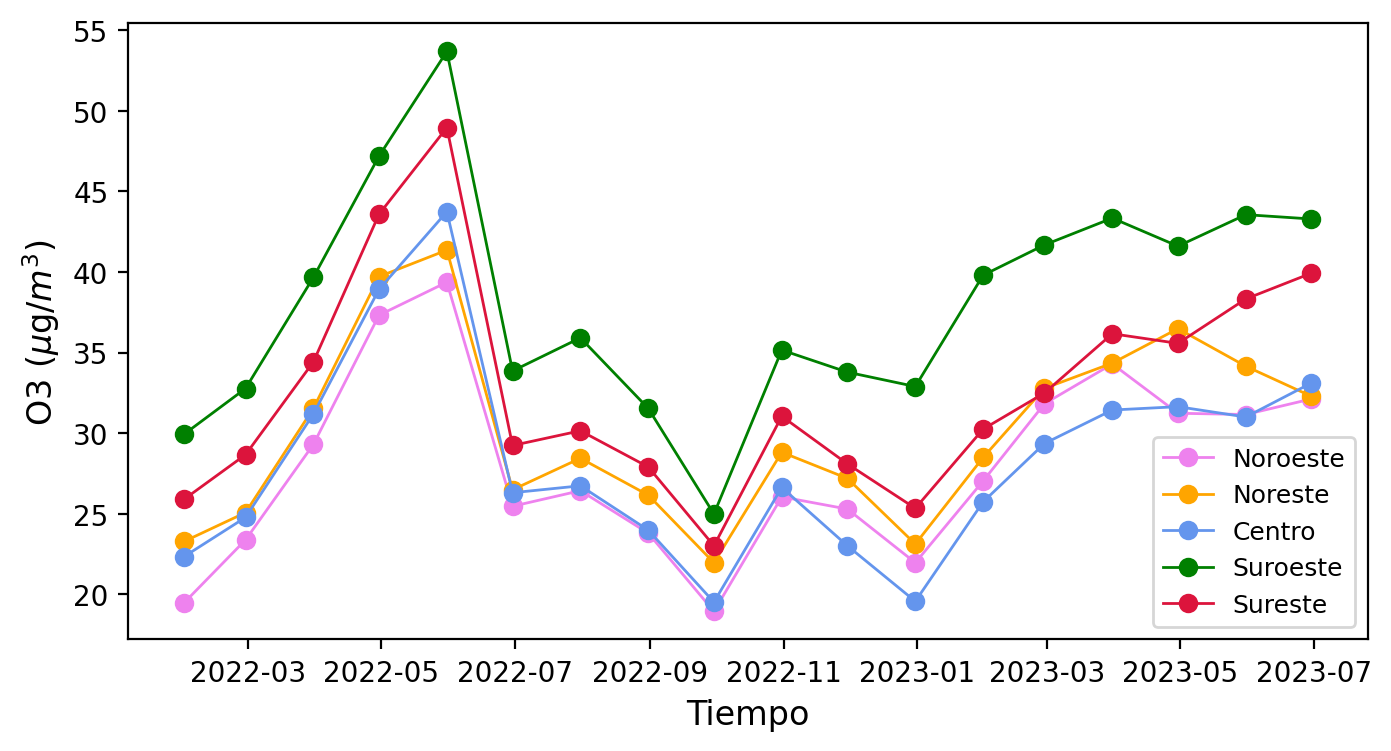

In [11]:
fig, ax = plt.subplots(figsize=(8,4),dpi=200)
ax.plot(ozono['Noroeste ozono'].resample('M').mean(), label='Noroeste',lw=1,color='violet',marker='o',markersize=6);
ax.plot(ozono['Noreste ozono'].resample('M').mean(), label='Noreste',lw=1,color='orange',marker='o',markersize=6);
ax.plot(ozono['Centro ozono'].resample('M').mean(), label='Centro',lw=1,color='cornflowerblue',marker='o',markersize=6);
ax.plot(ozono['Suroeste ozono'].resample('M').mean(), label='Suroeste',lw=1,color='green',marker='o',markersize=6);
ax.plot(ozono['Sureste ozono'].resample('M').mean(), label='Sureste',lw=1,color='crimson',marker='o',markersize=6);


ax.tick_params(labelsize=20)
ax.tick_params(labelsize=10)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':12 })
ax.set_ylabel('O3 ($\mu$g/$m^3$)', fontdict = {'fontsize':12 });
ax.legend(prop={'size': 9})

Para la tendencia

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",
                 parse_dates = True, index_col=0)

In [13]:
pip install pymannkendall

In [14]:
import pymannkendall as mk

In [15]:
mk_O3 = mk.original_test(df['CO'], alpha = 0.05)
mk_O3

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-30.242842773689368, Tau=-0.3639130125284738, s=-1717716.0, var_s=3225945254.6666665, slope=-0.00011620251765833534, intercept=0.6225196168519553)

In [16]:
a = mk_O3.slope
b = mk_O3.intercept
def f5(x):
  return x*a + b

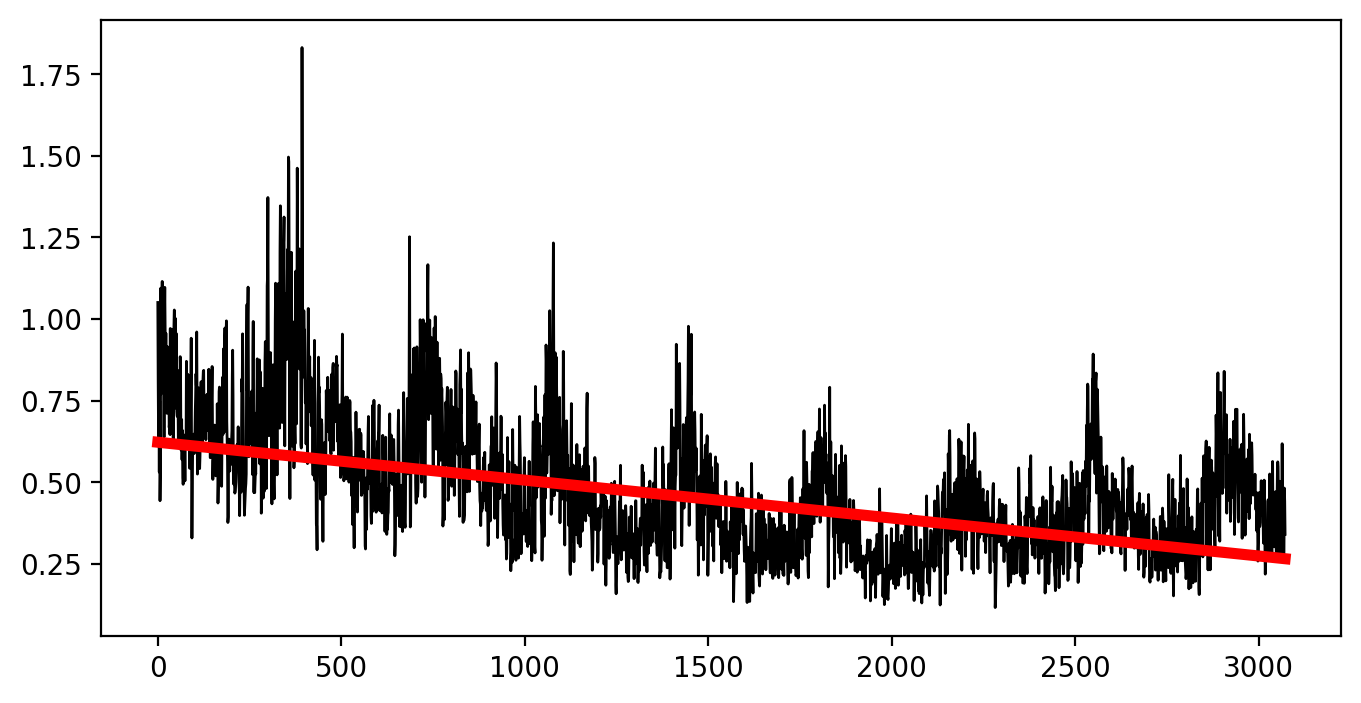

In [17]:
x = range(0, 3073)
fig, ax = plt.subplots(figsize = (8,4), dpi = 200)
ax.plot(x, df['CO'], lw = 1, color = 'black');
ax.plot(x, [f5(i) for i in x], color = 'red', lw = 4)

Análisis de tendencias Innovadoras (ITA)

In [18]:
len(df['O3'])/2

1536.5

In [19]:
sorted(df['O3'].iloc[0: 1536])

[3.2260536398467434,
 7.821011673151751,
 7.9559412550066755,
 8.171102661596958,
 8.738181818181818,
 9.061872909698996,
 9.396190476190476,
 9.788423153692614,
 9.79124579124579,
 9.915227629513344,
 10.040785498489424,
 11.54361370716511,
 11.556,
 11.583220568335587,
 11.597285067873305,
 11.76632801161103,
 11.781984334203656,
 12.137870855148345,
 12.434782608695652,
 12.566037735849056,
 12.581954887218044,
 12.600605143721634,
 12.64808362369338,
 12.902255639097744,
 12.927792915531334,
 12.932432432432432,
 12.97635605006954,
 12.97704918032787,
 13.070052539404552,
 13.171487603305785,
 13.22780569514238,
 13.25257731958763,
 13.297560975609755,
 13.46174863387978,
 13.719814241486068,
 13.720965309200604,
 13.741592920353982,
 13.74822695035461,
 13.78048780487805,
 13.811993517017829,
 13.823924731182796,
 13.877408056042032,
 13.93661971830986,
 14.04391891891892,
 14.09423076923077,
 14.105721393034823,
 14.107081174438688,
 14.205047318611989,
 14.295424836601308,
 14.4

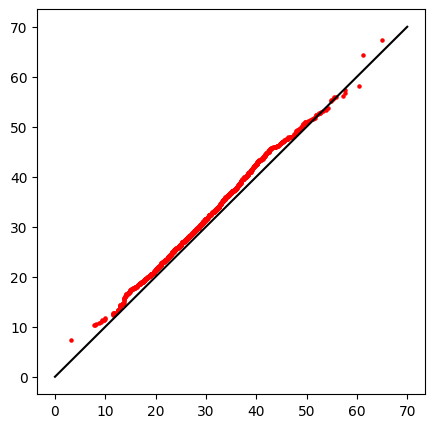

In [20]:
fig, ax = plt.subplots(figsize = (5,5), dpi = 100)
ax.scatter(sorted(df['O3'].iloc[0: 1536]), sorted(df['O3'].iloc[1537: 3073]), s = 5, color = 'red')
ax.plot([0, 70], [0,70], color = 'black')

In [21]:
mk_O3 = mk.original_test(df['O3'], alpha = 0.05)
mk_O3

Mann_Kendall_Test(trend='increasing', h=True, p=7.878453639476035e-05, z=3.9480676727635213, Tau=0.047507398104458184, s=224241.0, var_s=3225945255.6666665, slope=0.0007279234341137606, intercept=28.720293443585106)